
Especialização em Inteligência Artificial – IFMG

Análise de Séries Temporais

Lista de exercícios:  01

Aluno: Christhian Gonçalves

Professor: Carlos Severiano



1.	Defina o que é uma série temporal e explique como ela se difere de outros tipos de dados.

Dados em série temporal são conjuntos de dados coletados ou registrados em intervalos de tempo sucessivos. Esses dados são organizados cronologicamente, permitindo sua análise de como uma variável específica evolui ao longo do tempo. A organização cronológica é fundamental para a análise de séries temporais. Cada ponto de dados tem um carimbo de tempo (data, hora e etc) que indica quando foi registrado. Isso permite observar como a variável de interesse muda ao longo do tempo e também permite identificar padrões, tendências e sazonalidades. As séries temporais são diferentes de outros tipos de dados porque os valores de uma série temporal são dependentes do tempo. Isso significa que os valores de uma série temporal não são independentes um do outro, mas estão relacionados ao valor anterior.

2. Liste pelo menos três aplicações reais de séries temporais. Descreva brevemente como a análise de séries temporais é usada nesses casos e que tipo de decisões pode ser obtidas.

Telecomunicações: utiliza séries temporais para monitorar a utilização da rede, identificando tendências de crescimento no número de chamadas com análise de tendência para identificar, prever a demanda por linhas telefônicas com a modelagem de séries temporais e em serviços de streaming, pode usar a decomposição de séries temporais para separar os dados em componentes de tendência, sazonalidade e erro.

Tráfego e Transporte: utilizam séries temporais para monitorar o tráfego, prever congestionamentos, programar manutenção de infraestrutura rodoviária e planejar o transporte público com base na demanda sazonal.

Saúde Pública: Na área de saúde, as séries temporais são usadas para rastrear surtos de doenças, monitorar a disseminação de epidemias e planejar a distribuição de recursos de saúde. A análise de séries temporais pode ajudar a prever a propagação de doenças infecciosas, como a gripe, e auxiliar na alocação de recursos em hospitais.


3. Suponha que você tenha dados de vendas diárias de um produto ao longo de um ano. Descreva três etapas que você seguiria para realizar uma análise inicial desses dados de séries temporais.


	Exploração Inicial: Verificar a estrutura dos dados, identificando valores ausentes ou anômalos e calculando estatísticas descritivas básicas (média, mediana, desvio padrão).
	Visualização: Criar gráficos de linha para visualizar a tendência ao longo do tempo. Isso ajuda a identificar padrões sazonais, tendências e possíveis outliers.
	Decomposição: Separar a série temporal em seus componentes principais: tendência, sazonalidade e ruído. Isso pode ser feito usando métodos como a decomposição aditiva ou multiplicativa.

4. Pesquise bases de dados contendo séries temporais que apresentem as seguintes características: 

a. Tendência  
b. Sazonalidade  
c. Aleatoriedade  
d. Estacionariedade  
e. Não-estacionariedade

Para cada exemplo, apresente gráficos e descrições textuais que justifiquem a escolha da série.


4.Pesquise bases de dados contendo séries temporais que apresentem as seguintes
características:

a. Tendência

b. Sazonalidade

c. Aleatoriedade

d. Estacionariedade

e. Não-estacionariedade

Para cada exemplo, apresente gráficos e descrições textuais que justifiquem a escolha
da série.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

a. Tendência

Dataset: Dados de médias globais de temperatura

As temperaturas globais ao longo dos anos possuem tendência de crescimento ao longo dos anos.

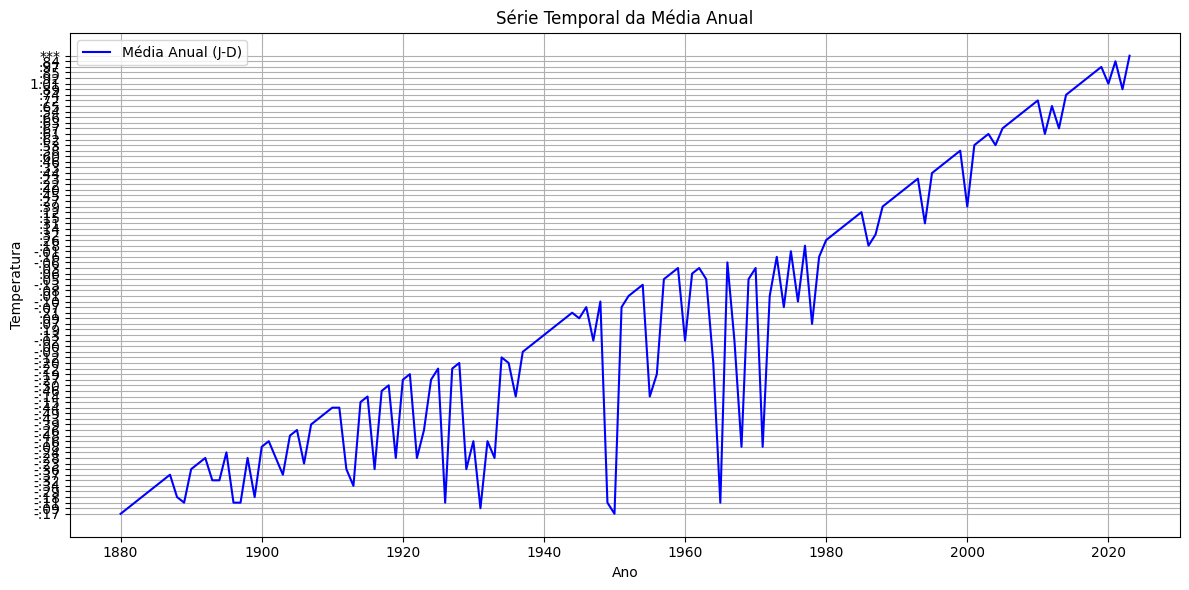

In [3]:
df = pd.read_csv('GLB.Ts+dSST.csv')

plt.figure(figsize=(12, 6))
plt.plot(df['Year'], df['J-D'], label='Média Anual (J-D)', color='blue')
plt.title('Série Temporal da Média Anual')
plt.xlabel('Ano')
plt.ylabel('Temperatura')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

b. Sazonalidade

É possível observar que a série temporal de produção de doces se repete a cada período de tempo ao longo dos anos.

In [4]:
df = pd.read_csv('candy_production.csv')
df = df.rename(columns={'observation_date': 'data', 'IPG3113N':'producao'})
df['data'] = pd.to_datetime(df['data'])
df = df.set_index('data')
df.head(5)



,producao
data,
1972-01-01,85.6945
1972-02-01,71.8200
1972-03-01,66.0229
1972-04-01,64.5645
1972-05-01,65.0100


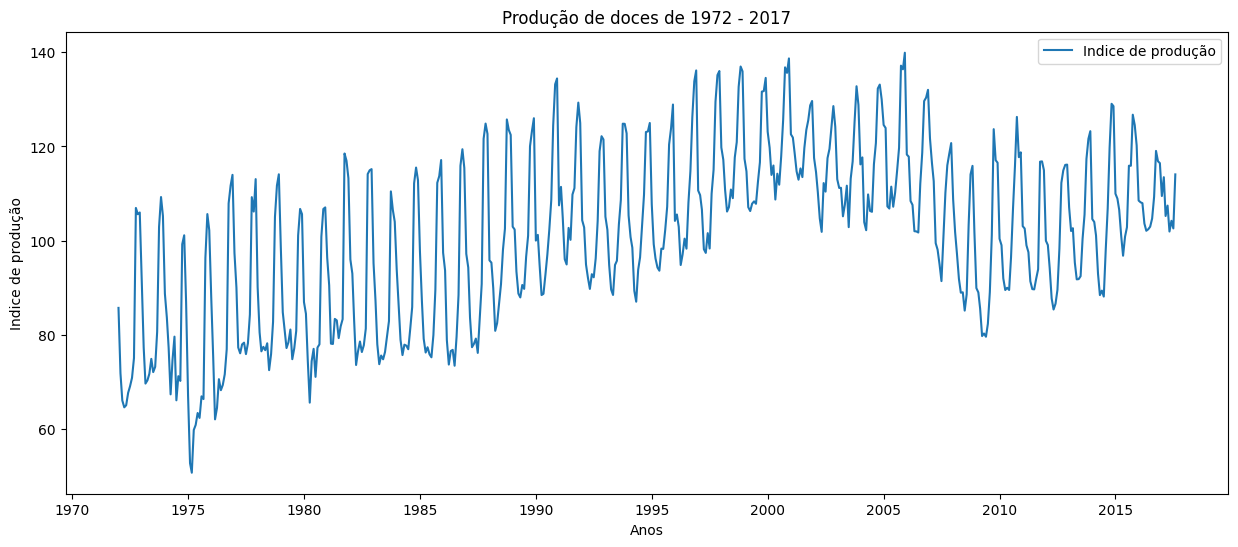

In [5]:
plt.figure(figsize=(15, 6))
plt.title('Produção de doces de 1972 - 2017')
plt.plot(df, label='Indice de produção')
plt.xlabel('Anos');
plt.ylabel('Indice de produção');
plt.legend(loc='best')
plt.show()

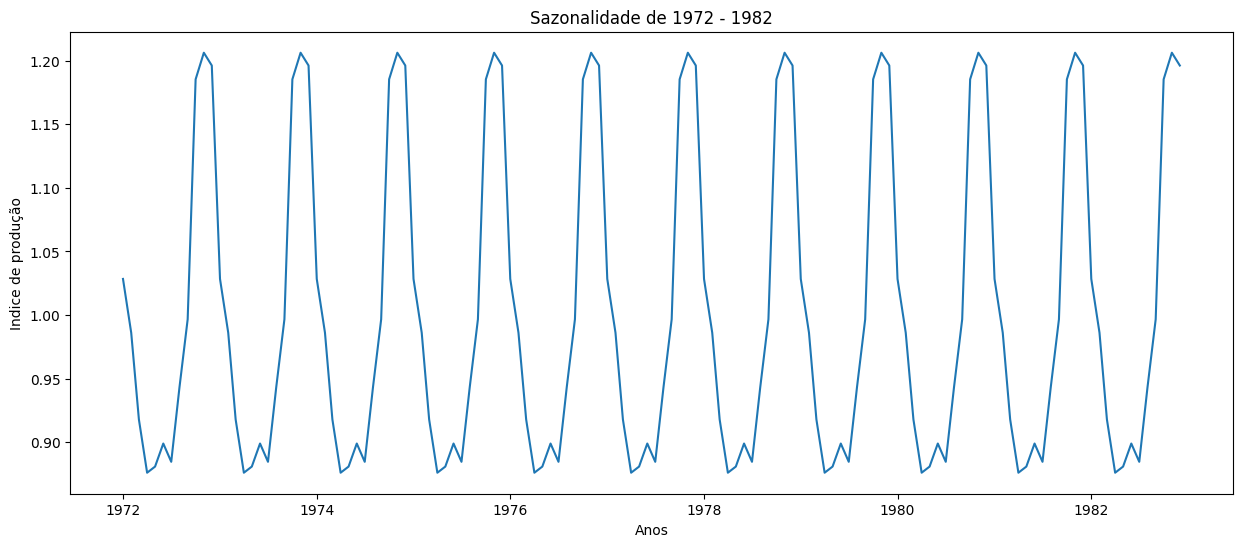

In [6]:
plt.figure(figsize=(15, 6))
resultado = seasonal_decompose(df, model='multiplicative')
plt.title('Sazonalidade de 1972 - 1982')
plt.plot(resultado.seasonal['1972':'1982'])
plt.xlabel('Anos')
plt.ylabel('Indice de produção')

plt.show()

c. Aleatoriedade

Em séries temporais aleatórias, os valores não seguem qualquer padrão discernível. Isso reflete eventos completamente imprevisíveis.

In [7]:
df = pd.read_csv('SHIB-USD.csv')

df.head()



,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-08-01,0.0,0.0,0.0,0.0,0.0,1604789
1,2020-08-02,0.0,0.0,0.0,0.0,0.0,193098
2,2020-08-03,0.0,0.0,0.0,0.0,0.0,129225
3,2020-08-04,0.0,0.0,0.0,0.0,0.0,19717
4,2020-08-05,0.0,0.0,0.0,0.0,0.0,26869


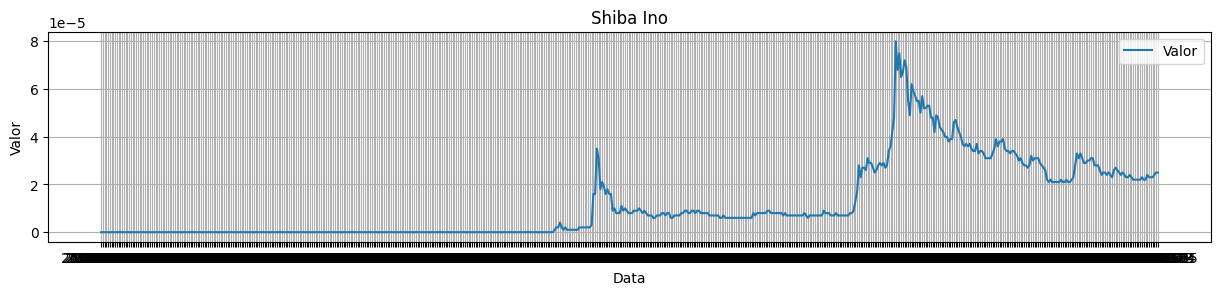

In [8]:
plt.figure(figsize=(15, 6))
plt.subplot(2, 1, 1)
plt.plot(df['Date'], df['Close'], label='Valor')
plt.title('Shiba Ino')
plt.xlabel('Data')
plt.ylabel('Valor')
plt.grid(True)
plt.legend()



d. Estacionariedade

Após a diferenciação, as oscilações no número de manchas solares não apresentam tendência de aumento ou diminuição no tempo. Isso indica que a média permanece constante.

Embora os dados originais tenham ciclos visíveis, a série diferenciada remove essa componente, tornando as flutuações aleatórias em torno de um valor fixo.

Teste de Dickey-Fuller:
Estatística de Teste: -8.647590698681162
p-valor: 5.21969068133879e-14


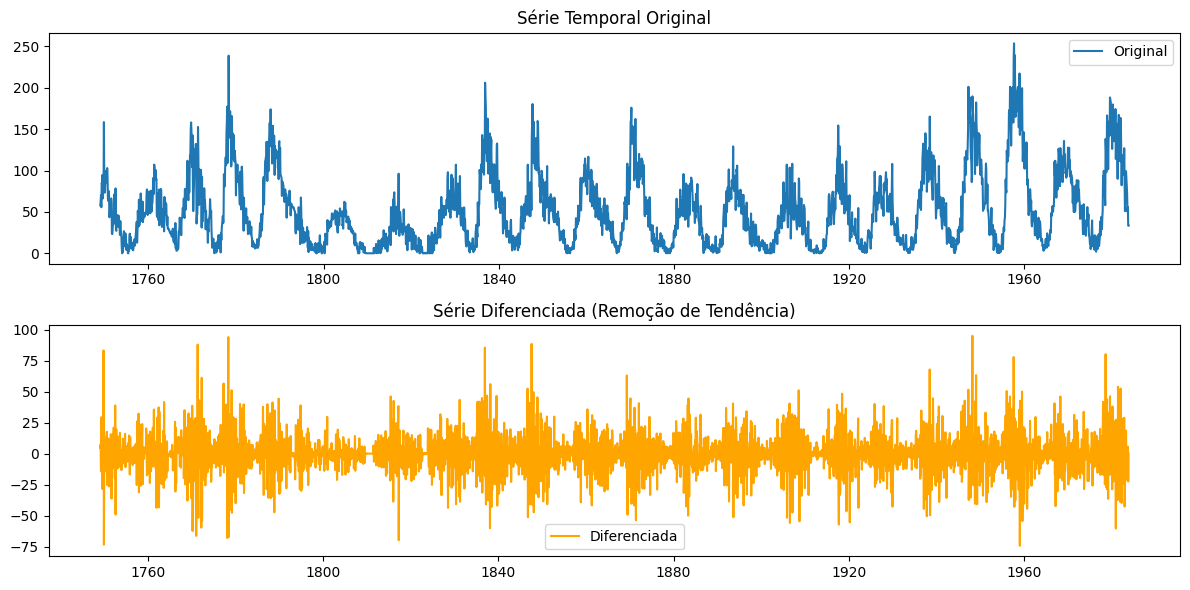

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Carregar os dados
df = pd.read_csv("monthly-sunspots.csv", header=0, index_col=0)
df.index = pd.to_datetime(df.index, format='%Y-%m')

# Aplicar a diferenciação
df['Differenced'] = df['Sunspots'].diff()

# Remover valores nulos resultantes da diferenciação
data_diff = df.dropna()

# Teste de Dickey-Fuller para estacionariedade
result = adfuller(data_diff['Differenced'])
print("Teste de Dickey-Fuller:")
print(f"Estatística de Teste: {result[0]}")
print(f"p-valor: {result[1]}")

# Plotando a série original e diferenciada
plt.figure(figsize=(12, 6))

# Série original
plt.subplot(2, 1, 1)
plt.plot(df.index, df['Sunspots'], label='Original')
plt.title('Série Temporal Original')
plt.legend()

# Série diferenciada
plt.subplot(2, 1, 2)
plt.plot(data_diff.index, data_diff['Differenced'], label='Diferenciada', color='orange')
plt.title('Série Diferenciada (Remoção de Tendência)')
plt.legend()

plt.tight_layout()
plt.show()


e. Não-Estacionariedade

Os dados apresentam tendência crescente e possíveis padrões sazonais, indicando não-estacionariedade. A média e a variância mudam ao longo do tempo.

Teste Dickey-Fuller nos Dados Originais: Valor-p elevado (geralmente > 0,05) sugere que os dados não são estacionários.

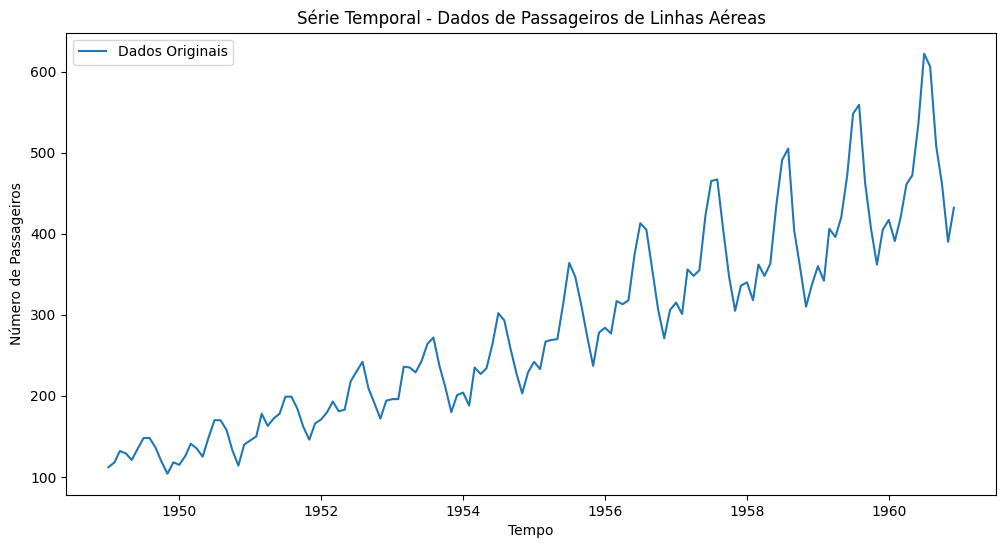

            Passengers
Month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121
Teste Dickey-Fuller para Estacionariedade:
Estatística ADF: 0.8153688792060482
Valor-p: 0.991880243437641
Valores Críticos: {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

data = pd.read_csv('airline-passengers.csv')

# Preprocessamento
data["Month"] = pd.to_datetime(data["Month"])
data.set_index("Month", inplace=True)

# Plot da série temporal
plt.figure(figsize=(12, 6))
plt.plot(data, label="Dados Originais")
plt.title("Série Temporal - Dados de Passageiros de Linhas Aéreas")
plt.xlabel("Tempo")
plt.ylabel("Número de Passageiros")
plt.legend()
plt.show()

# Teste Dickey-Fuller
adf_result = adfuller(data["Passengers"])
print(data.head())
print("Teste Dickey-Fuller para Estacionariedade:")
print(f"Estatística ADF: {adf_result[0]}")
print(f"Valor-p: {adf_result[1]}")
print(f"Valores Críticos: {adf_result[4]}")

